In [1]:
# %pip install yfinance
import pandas as pd
import yfinance as yf 
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
# Manual inputs
TIMEFRAME = "1d"
LOOKBACK_PERIOD = "5y" 
UNIVERSE = ["QQQ", "SPY", "TSLA", "AAPL", "TSM", "MRK", "KO", "MCD", "MSFT", "JNJ", "PFE", "PM"]

#Implementation:

In [3]:
stock_list = []
for stock in UNIVERSE:
  returns = yf.Ticker(stock).history(period=LOOKBACK_PERIOD, interval=TIMEFRAME)
  returns["returns"] =  np.log(1+returns["Close"].pct_change()) # returns["Close"].pct_change()
  returns.rename(columns={"returns": stock}, inplace=True)
  stock_list.append(returns[stock])

In [4]:
correl_matrix = pd.DataFrame(stock_list).T.corr().round(4)

# Correlation matrix

In [5]:
correl_matrix.style.background_gradient(cmap ='coolwarm')

,QQQ,SPY,TSLA,AAPL,TSM,MRK,KO,MCD,MSFT,JNJ,PFE,PM
QQQ,1.000000,0.932900,0.572100,0.867200,0.678500,0.388800,0.476300,0.533900,0.901700,0.447300,0.391600,0.402100
SPY,0.932900,1.000000,0.488400,0.807500,0.637200,0.500800,0.643200,0.661600,0.838300,0.563900,0.487100,0.553400
TSLA,0.572100,0.488400,1.000000,0.478900,0.407600,0.132200,0.187500,0.292900,0.457200,0.121500,0.102900,0.180500
AAPL,0.867200,0.807500,0.478900,1.000000,0.575500,0.343100,0.423600,0.466500,0.767400,0.410100,0.342800,0.365900
TSM,0.678500,0.637200,0.407600,0.575500,1.000000,0.206200,0.264700,0.353700,0.567000,0.239900,0.168900,0.302400
MRK,0.388800,0.500800,0.132200,0.343100,0.206200,1.000000,0.471100,0.451600,0.386500,0.575100,0.500100,0.422800
KO,0.476300,0.643200,0.187500,0.423600,0.264700,0.471100,1.000000,0.564400,0.447000,0.557400,0.437500,0.558200
MCD,0.533900,0.661600,0.292900,0.466500,0.353700,0.451600,0.564400,1.000000,0.503200,0.440000,0.311700,0.490300
MSFT,0.901700,0.838300,0.457200,0.767400,0.567000,0.386500,0.447000,0.503200,1.000000,0.430800,0.369400,0.361600
JNJ,0.447300,0.563900,0.121500,0.410100,0.239900,0.575100,0.557400,0.440000,0.430800,1.000000,0.543800,0.456200


# Analysis: Market beta vs Market correlation

In [6]:
# Get data for the stock and SPY
stock = yf.Ticker("AAPL")
SPY = yf.Ticker("SPY")

def calc_beta(stock, benchmark="SPY"):
    '''
    Quantifies the systematic risk of a stock compared to the market as a whole.

    Parameters:
    stock (str): The ticker symbol of the stock
    benchmark (str): The ticker symbol of the benchmark. Default is SPY to compare against the S&P 500

    Returns: 
    beta (flaot): The beta of the stock against the benchmark
    A beta greater than 1 indicates that the stock is more volatile than the market, 
    while a beta less than 1 indicates that it is less volatile .

    '''

    # Get the historical closes
    stock_hc = yf.Ticker(stock).history(period=LOOKBACK_PERIOD)
    benchmark_hc = yf.Ticker(benchmark).history(period=LOOKBACK_PERIOD)

    # Calculate the daily returns for the stock and SPY
    stock_returns = stock_hc['Close'].pct_change()
    SPY_returns = benchmark_hc['Close'].pct_change()

    # Calculate the beta of the stock against SPY
    covar = stock_returns.cov(SPY_returns)
    var = SPY_returns.var()

    return covar / var # beta

In [7]:
# Calc the beta in each of the stock in our UNIVESRE
beta_map = {}
for stock in UNIVERSE:
    beta_map[stock] = calc_beta(stock)


In [8]:
# Correl with SPY Map
correl_with_SPY_map = {}
for stock in UNIVERSE:
    correl_with_SPY_map[stock] = correl_matrix[stock]["SPY"]


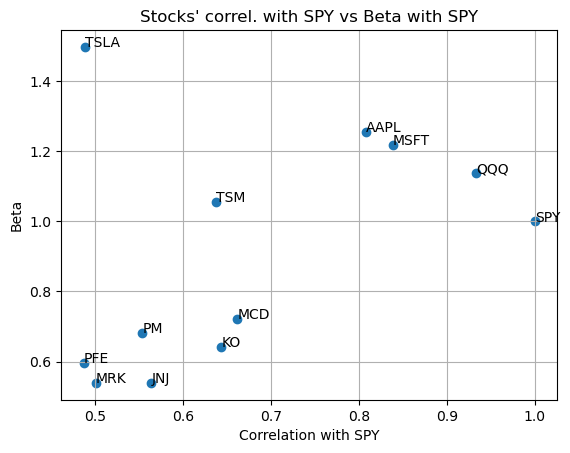

In [11]:
# Scatter plot: Correl with SPY vs Beta
plt.scatter(correl_with_SPY_map.values(), beta_map.values())

# Set labels
plt.xlabel("Correlation with SPY"), plt.ylabel("Beta")

# Put label on each point
for label, correl in correl_with_SPY_map.items():
    beta = beta_map[label]
    plt.annotate(label, (correl, beta))

# Add grids to show quadrants
# Ideally, we want to hold stocks that are scattered across, covering as many quandrants as possible
plt.grid()

# Set title
plt.title("Stocks' correl. with SPY vs Beta with SPY");
